Data Collection and Processing


1.) INTRODUCTION

London is known for having some world renouned institutions of higher education. According to the data published by the Higher Education Statistical Agency (HESA), in the academic year 2016-2017 London admitted 112,200 international students to its universities.

One of the largest issues for new students is finding accomedations to live during the school term. Student halls are the most reliable means of housing for students, but it is not easy to secure housing in high demand areas. In this project, I intend analyze different neighborhoods of London and find a new designated location to build new student halls for international students in London. This research is expected to benefit real-estate investors looking for a profitable location or international students looking for a place to live in London.

This study will focus only on the safety and the general atmosphere of the neighborhood. Distance to universities are also an important factor in choosing a student hall, but as student halls accept students from different universities, it will be disregarded in this project.


2.) DATA


London Crime Records by Geographic Breakdown

    London crime records by boroughs in the last 24 months
    
    url:'https://data.london.gov.uk/download/recorded_crime_summary/d2e9ccfc-a054-41e3-89fb-53c2bc3ed87a/MPS%20Borough%20Level%20Crime%20%28most%20recent%2024%20months%29.csv'




In [135]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install beautifulsoup4
!{sys.executable} -m pip install requests

In [138]:
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
import requests
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

In [139]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                       

In [189]:
#Collect the data from link
df= 'https://data.london.gov.uk/download/recorded_crime_summary/d2e9ccfc-a054-41e3-89fb-53c2bc3ed87a/MPS%20Borough%20Level%20Crime%20%28most%20recent%2024%20months%29.csv'
crime = pd.read_csv(df)
crime.head()

,MajorText,MinorText,LookUp_BoroughName,201806,201807,201808,201809,201810,201811,201812,...,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005
0,Arson and Criminal Damage,Arson,Barking and Dagenham,12,6,5,3,8,5,1,...,3,6,9,8,6,4,5,6,2,2
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,123,127,101,107,132,105,88,...,118,109,109,97,121,97,103,107,80,88
2,Burglary,Burglary - Business and Community,Barking and Dagenham,33,30,18,33,32,39,33,...,35,37,30,30,25,31,17,28,29,16
3,Burglary,Burglary - Residential,Barking and Dagenham,77,94,84,99,94,106,164,...,67,80,97,114,130,116,123,97,57,41
4,Drug Offences,Drug Trafficking,Barking and Dagenham,6,8,7,10,7,7,4,...,7,7,10,12,3,13,4,6,11,11


In [190]:
crime.shape

(1566, 27)

In [193]:
# Names of Boroughs
crime['LookUp_BoroughName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'London Heathrow and London City Airports', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [195]:
# Create a column for sum of incidents in 24 months
crime['Sum'] = crime.iloc[:,3:27].sum(axis=1)
crimesum = crime['Sum']
crime.drop(labels=['Sum'], axis=1,inplace = True)
crime.insert(3, 'Sum', crimesum)
crime.head()

,MajorText,MinorText,LookUp_BoroughName,Sum,201806,201807,201808,201809,201810,201811,...,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005
0,Arson and Criminal Damage,Arson,Barking and Dagenham,377,12,6,5,3,8,5,...,3,6,9,8,6,4,5,6,2,2
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,7897,123,127,101,107,132,105,...,118,109,109,97,121,97,103,107,80,88
2,Burglary,Burglary - Business and Community,Barking and Dagenham,2068,33,30,18,33,32,39,...,35,37,30,30,25,31,17,28,29,16
3,Burglary,Burglary - Residential,Barking and Dagenham,6929,77,94,84,99,94,106,...,67,80,97,114,130,116,123,97,57,41
4,Drug Offences,Drug Trafficking,Barking and Dagenham,509,6,8,7,10,7,7,...,7,7,10,12,3,13,4,6,11,11


In [196]:
# Delete unnecessary columns
crime.drop(crime.columns[0:2], axis=1, inplace=True)
crime.drop(crime.columns[2:26], axis=1, inplace=True)
crime.head()

,LookUp_BoroughName,Sum
0,Barking and Dagenham,377
1,Barking and Dagenham,7897
2,Barking and Dagenham,2068
3,Barking and Dagenham,6929
4,Barking and Dagenham,509


In [197]:
# Calculate sum of incidents in the last 24 months by boroughs
crime = crime.groupby(['LookUp_BoroughName'], as_index=False).sum()
crime.head()

,LookUp_BoroughName,Sum
0,Barking and Dagenham,113273
1,Barnet,174512
2,Bexley,99078
3,Brent,176151
4,Bromley,140520


In [198]:
# Change the sum into monthly average
crime['Sum'] = crime['Sum']/24
crime.rename(columns={crime.columns[1]:'MonthlyAverage'}, inplace=True)
crime.head()

,LookUp_BoroughName,MonthlyAverage
0,Barking and Dagenham,4719.708333
1,Barnet,7271.333333
2,Bexley,4128.250000
3,Brent,7339.625000
4,Bromley,5855.000000


In [199]:
crime.rename(columns={crime.columns[0]:'BoroughName'}, inplace=True)
crime.head()

,BoroughName,MonthlyAverage
0,Barking and Dagenham,4719.708333
1,Barnet,7271.333333
2,Bexley,4128.250000
3,Brent,7339.625000
4,Bromley,5855.000000


In [200]:
# Explore the clean dataset - borough with most incidents?
crime.sort_values(by='MonthlyAverage', ascending=False).head()

,BoroughName,MonthlyAverage
32,Westminster,17839.916667
27,Southwark,9083.708333
5,Camden,9057.583333
24,Newham,8644.166667
20,Lambeth,8473.000000


In [201]:
### Explore the clean dataset - borough with least incidents?
crime.sort_values(by='MonthlyAverage', ascending=True).head()

,BoroughName,MonthlyAverage
22,London Heathrow and London City Airports,806.708333
26,Richmond upon Thames,3095.500000
19,Kingston upon Thames,3096.125000
28,Sutton,3269.083333
23,Merton,3432.958333


London Boroughs

    Information on boroughs and their population & coordinates
    -Population can be used to calcuate the ratio of reported crime to population for better comparison.
    -Coordinates can be used to get neighborhood data from Foursquare.
    url: https://en.wikipedia.org/wiki/List_of_London_boroughs


In [202]:
import requests
import lxml
from bs4 import BeautifulSoup

In [203]:
# Obtaining data from Wikipedia
source = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text
soup = BeautifulSoup(source, 'lxml')
soup.encode("utf-8-sig")

b'\xef\xbb\xbf<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n<head>\n<meta charset="utf-8-sig"/>\n<title>List of London boroughs - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"3457b1c0-6147-4879-bec1-79f8979e30b9","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":958873870,"wgRevisionId":958873870,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of coordinates","Geographic coordinat

In [204]:
BoroughName = []
Population = []
Coordinates = []

for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0:
        BoroughName.append(cells[0].text.rstrip('\n'))
        Population.append(cells[7].text.rstrip('\n'))
        Coordinates.append(cells[8].text.rstrip('\n'))

In [205]:
# Form a dataframe
dict = {'BoroughName' : BoroughName,
       'Population' : Population,
       'Coordinates': Coordinates}
info = pd.DataFrame.from_dict(dict)
info.head()

,BoroughName,Population,Coordinates
0,Barking and Dagenham [note 1],"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [206]:
# Strip unwanted texts
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip(']'))
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip('1234567890.'))
info['BoroughName'] = info['BoroughName'].str.replace('note','')
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip(' ['))
info.head()

,BoroughName,Population,Coordinates
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [207]:
# Clean coordinates
info[['Coordinates1','Coordinates2','Coordinates3']] = info['Coordinates'].str.split('/',expand=True)
info.head()

,BoroughName,Population,Coordinates,Coordinates1,Coordinates2,Coordinates3
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,51°33′39″N 0°09′21″E﻿,﻿51.5607°N 0.1557°E﻿,51.5607; 0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W﻿,51.6252; -0.1517﻿ (Barnet)
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E﻿,51.4549; 0.1505﻿ (Bexley)
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W﻿,51.5588; -0.2817﻿ (Brent)
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E﻿,51.4039; 0.0198﻿ (Bromley)


In [208]:
info.drop(labels=['Coordinates','Coordinates1','Coordinates2'], axis=1,inplace = True)
info[['Latitude','Longitude']] = info['Coordinates3'].str.split(';',expand=True)
info.head()

,BoroughName,Population,Coordinates3,Latitude,Longitude
0,Barking and Dagenham,"194,352",51.5607; 0.1557﻿ (Barking and Dagenham),51.5607,0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51.6252; -0.1517﻿ (Barnet),51.6252,-0.1517﻿ (Barnet)
2,Bexley,"236,687",51.4549; 0.1505﻿ (Bexley),51.4549,0.1505﻿ (Bexley)
3,Brent,"317,264",51.5588; -0.2817﻿ (Brent),51.5588,-0.2817﻿ (Brent)
4,Bromley,"317,899",51.4039; 0.0198﻿ (Bromley),51.4039,0.0198﻿ (Bromley)


In [209]:
info.drop(labels=['Coordinates3'], axis=1,inplace = True)
info['Latitude'] = info['Latitude'].map(lambda x: x.rstrip(u'\ufeff'))
info['Latitude'] = info['Latitude'].map(lambda x: x.lstrip())
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(')'))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ '))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(' ('))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(u'\ufeff'))
info['Longitude'] = info['Longitude'].map(lambda x: x.lstrip())
info['Population'] = info['Population'].str.replace(',','')
info.head()

,BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [210]:
info['BoroughName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

FROM FOURSQUARE API: LIST OF TOP 50 LOCATIONS IN THE NEIGHBORHOOD.

Define Foursquare Credentials and Version

In [211]:
CLIENT_ID = 'CZIU3NO3QASE0MY4LGEGZEM4D35FPA2OZYYS3HD3WS2BS04P' # your Foursquare ID
CLIENT_SECRET = 'CAECUSQR01LV2QGFIEWOXAFFPJHLHCR3VF0SMPRHDTGB1XEU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)



Your credentails:
CLIENT_ID: CZIU3NO3QASE0MY4LGEGZEM4D35FPA2OZYYS3HD3WS2BS04P
CLIENT_SECRET:CAECUSQR01LV2QGFIEWOXAFFPJHLHCR3VF0SMPRHDTGB1XEU


In [215]:
#Create a function to explore all borough
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['BoroughName', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [216]:
#Get top 50 venues in 500m radius of the center of each Borough
LIMIT = 50
venues = getNearbyVenues(names=info['BoroughName'],
                                   latitudes=info['Latitude'],
                                   longitudes=info['Longitude']
                                  )



Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [217]:
print(venues.shape)
venues.head()




(1134, 7)


,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket
4,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center


3.) METHODOLOGY:

Now that the Data is cleaned, I will use Cluster Analysis Visualization to classify the neighborhoods into more desired areas.

In [218]:
#Review our data
crime

,BoroughName,MonthlyAverage
0,Barking and Dagenham,4719.708333
1,Barnet,7271.333333
2,Bexley,4128.250000
3,Brent,7339.625000
4,Bromley,5855.000000
5,Camden,9057.583333
6,Croydon,8020.458333
7,Ealing,7372.125000
8,Enfield,7150.625000
9,Greenwich,6687.708333


In [219]:
info

,BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198
5,Camden,229719,51.5290,-0.1255
6,Croydon,372752,51.3714,-0.0977
7,Ealing,342494,51.5130,-0.3089
8,Enfield,320524,51.6538,-0.0799
9,Greenwich,264008,51.4892,0.0648


In [220]:
venues

,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket
4,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
5,Barking and Dagenham,51.5607,0.1557,Becontree Heath Bus Station,51.561065,0.150998,Bus Station
6,Barking and Dagenham,51.5607,0.1557,Dagenham Swimming Pool,51.560946,0.150054,Pool
7,Barnet,51.6252,-0.1517,The Atrium,51.624726,-0.151933,Café
8,Barnet,51.6252,-0.1517,Beaconsfield Road (BF),51.622827,-0.151466,Bus Stop
9,Barnet,51.6252,-0.1517,Oakleigh Cafe,51.623412,-0.154899,Café


In [221]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

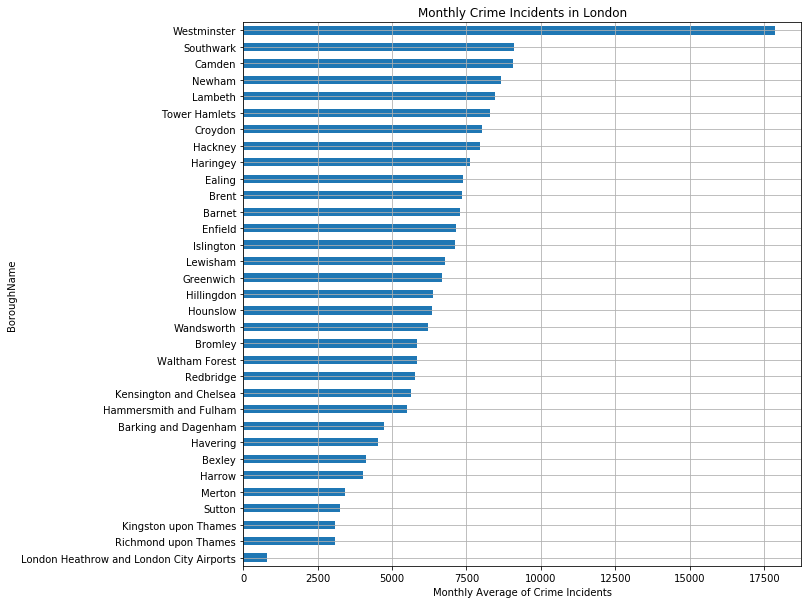

In [222]:
#Visualize crime data
crime.set_index('BoroughName')['MonthlyAverage'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Average of Crime Incidents')
plt.title('Monthly Crime Incidents in London')
plt.show()

According to the graph, Westminster by far has the most Monthly Average Crime Incidents.

In [223]:
#Drop Heathrow Airport as it is not a residential area & not included in population data
crime.drop([22], inplace=True)


In [224]:
#Combine crime data and borough information data
df = pd.merge(crime,info, how='outer', on='BoroughName')
df.head()

,BoroughName,MonthlyAverage,Population,Latitude,Longitude
0,Barking and Dagenham,4719.708333,194352,51.5607,0.1557
1,Barnet,7271.333333,369088,51.6252,-0.1517
2,Bexley,4128.250000,236687,51.4549,0.1505
3,Brent,7339.625000,317264,51.5588,-0.2817
4,Bromley,5855.000000,317899,51.4039,0.0198


In [225]:
#Check data type
df.dtypes

BoroughName        object
MonthlyAverage    float64
Population         object
Latitude           object
Longitude          object
dtype: object

In [226]:
df['Population'] = pd.to_numeric(df['Population'])
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])
df.dtypes

BoroughName        object
MonthlyAverage    float64
Population          int64
Latitude          float64
Longitude         float64
dtype: object

In [227]:
df.shape



(32, 5)

In [228]:
#Create a column that shows the number of crimes per 1000 people per month
df['Population'].astype(float)
df['CrimeToPop'] = df['MonthlyAverage'] / df['Population'] * 1000
df.head()

,BoroughName,MonthlyAverage,Population,Latitude,Longitude,CrimeToPop
0,Barking and Dagenham,4719.708333,194352,51.5607,0.1557,24.284331
1,Barnet,7271.333333,369088,51.6252,-0.1517,19.700812
2,Bexley,4128.250000,236687,51.4549,0.1505,17.441811
3,Brent,7339.625000,317264,51.5588,-0.2817,23.134125
4,Bromley,5855.000000,317899,51.4039,0.0198,18.417799


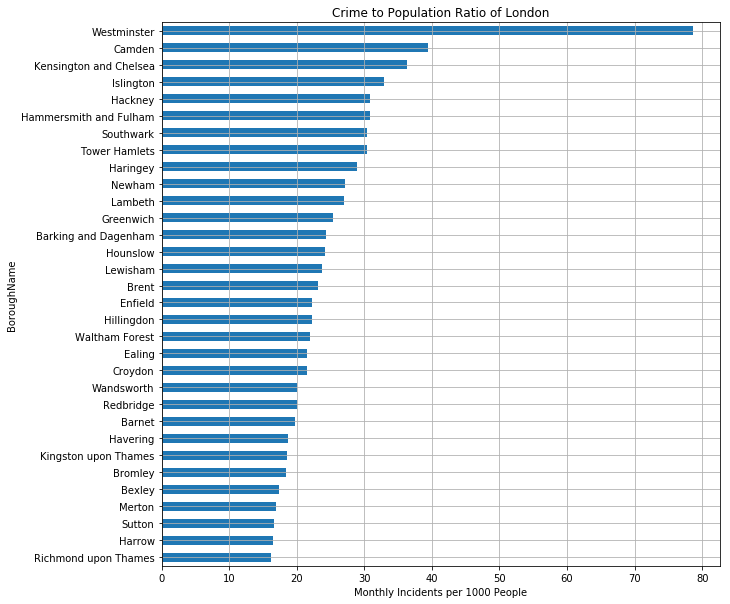

In [229]:
#Visualize crime per 1000 people
df.set_index('BoroughName')['CrimeToPop'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Incidents per 1000 People')
plt.title('Crime to Population Ratio of London')
plt.show()

In [230]:
from geopy.geocoders import Nominatim

In [231]:
#Get coordinates of London
address = 'London, UK'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [232]:
import folium

In [233]:
# make a map of London using folium
map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough in zip(df['Latitude'], df['Longitude'], df['BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

Westminster and Camden still remains top 2 dangerous area even after taking population into consideration.

NOW WILL BE USING ANALYSIS USING CLUSTERS USING K-MEANS CLUSTERING.



In [235]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 186 uniques categories.


In [236]:
# One hot encoding before clustering
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

In [237]:
# Add borough name back to dataframe
borough = venues['BoroughName']
onehot.insert(0, 'BoroughName', borough)
onehot.head()



,BoroughName,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [238]:
onehot.shape



(1134, 187)

In [239]:
# Group rows by borough and take the mean of frequency of each venue category
grouped = onehot.groupby('BoroughName').mean().reset_index()
grouped

,BoroughName,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000
1,Barnet,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000
2,Bexley,0.00000,0.000000,0.000000,0.000000,0.034483,0.00,0.000000,0.00,0.00,...,0.00,0.000000,0.034483,0.000000,0.034483,0.00,0.00,0.00,0.00,0.000000
3,Brent,0.00000,0.000000,0.000000,0.000000,0.040000,0.00,0.000000,0.00,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000
4,Bromley,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000
5,Camden,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.020000,0.00,0.00,...,0.02,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000
6,Croydon,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000
7,Ealing,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.020000,0.00,0.00,...,0.00,0.000000,0.020000,0.040000,0.000000,0.02,0.00,0.00,0.00,0.000000
8,Enfield,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.00,0.000000,0.040000,0.000000,0.000000,0.00,0.00,0.00,0.02,0.000000
9,Greenwich,0.02381,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.00,0.000000,0.000000,0.023810,0.023810,0.00,0.00,0.00,0.00,0.000000


In [240]:
# top 5 venues for each neighborhood
num_top_venues = 5

for hood in grouped['BoroughName']:
    print("----"+hood+"----")
    temp = grouped[grouped['BoroughName'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
         venue  freq
0         Pool  0.14
1  Bus Station  0.14
2  Supermarket  0.14
3  Golf Course  0.14
4         Park  0.14


----Barnet----
                venue  freq
0                Café  0.67
1            Bus Stop  0.33
2  African Restaurant  0.00
3          Public Art  0.00
4        Noodle House  0.00


----Bexley----
                venue  freq
0                 Pub  0.10
1      Clothing Store  0.10
2         Coffee Shop  0.10
3            Pharmacy  0.07
4  Italian Restaurant  0.07


----Brent----
            venue  freq
0     Coffee Shop  0.12
1           Hotel  0.10
2  Clothing Store  0.08
3   Grocery Store  0.06
4             Bar  0.04


----Bromley----
            venue  freq
0  Clothing Store  0.15
1     Coffee Shop  0.13
2    Burger Joint  0.05
3     Pizza Place  0.05
4             Bar  0.05


----Camden----
            venue  freq
0            Café  0.08
1     Coffee Shop  0.08
2           Hotel  0.06
3    Burger Joint  0.04
4  Breakfast Spo

In [241]:
# Put into pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['BoroughName']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['BoroughName'] = grouped['BoroughName']

for ind in np.arange(grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,BoroughName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Pool,Golf Course,Bus Station,Supermarket,Park,Gym / Fitness Center,Martial Arts Dojo,Film Studio,Fast Food Restaurant,Farmers Market
1,Barnet,Café,Bus Stop,Yoga Studio,English Restaurant,Flea Market,Fish Market,Fish & Chips Shop,Film Studio,Fast Food Restaurant,Farmers Market
2,Bexley,Coffee Shop,Pub,Clothing Store,Fast Food Restaurant,Pharmacy,Supermarket,Italian Restaurant,Portuguese Restaurant,Shopping Mall,Sandwich Place
3,Brent,Coffee Shop,Hotel,Clothing Store,Grocery Store,Bar,Sporting Goods Shop,American Restaurant,Sandwich Place,Outlet Store,Burger Joint
4,Bromley,Clothing Store,Coffee Shop,Burger Joint,Pizza Place,Bar,Fast Food Restaurant,Sandwich Place,English Restaurant,Furniture / Home Store,Stationery Store


In [242]:
#Now must use the K Means Clustering
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [243]:
kclusters = 5
london_cluster = grouped.drop('BoroughName', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_cluster)

kmeans.labels_[0:10]

array([1, 2, 3, 3, 3, 1, 1, 1, 3, 3], dtype=int32)

In [244]:
# add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge toronto_grouped with toronto coords to add latitude/longitude for each neighborhood
london_merged = df
london_merged = london_merged.join(venues_sorted.set_index('BoroughName'), on='BoroughName')

london_merged.head()

,BoroughName,MonthlyAverage,Population,Latitude,Longitude,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,4719.708333,194352,51.5607,0.1557,24.284331,1,Pool,Golf Course,Bus Station,Supermarket,Park,Gym / Fitness Center,Martial Arts Dojo,Film Studio,Fast Food Restaurant,Farmers Market
1,Barnet,7271.333333,369088,51.6252,-0.1517,19.700812,2,Café,Bus Stop,Yoga Studio,English Restaurant,Flea Market,Fish Market,Fish & Chips Shop,Film Studio,Fast Food Restaurant,Farmers Market
2,Bexley,4128.250000,236687,51.4549,0.1505,17.441811,3,Coffee Shop,Pub,Clothing Store,Fast Food Restaurant,Pharmacy,Supermarket,Italian Restaurant,Portuguese Restaurant,Shopping Mall,Sandwich Place
3,Brent,7339.625000,317264,51.5588,-0.2817,23.134125,3,Coffee Shop,Hotel,Clothing Store,Grocery Store,Bar,Sporting Goods Shop,American Restaurant,Sandwich Place,Outlet Store,Burger Joint
4,Bromley,5855.000000,317899,51.4039,0.0198,18.417799,3,Clothing Store,Coffee Shop,Burger Joint,Pizza Place,Bar,Fast Food Restaurant,Sandwich Place,English Restaurant,Furniture / Home Store,Stationery Store


In [245]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['BoroughName'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Check the Clusters and name them in coordination to their characteristics

In [246]:
# Cluster 0: Healthy area
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Hounslow,24.195239,0,Café,Park,Chinese Restaurant,Bed & Breakfast,Yoga Studio,Electronics Store,Fish Market,Fish & Chips Shop,Film Studio,Fast Food Restaurant


In [247]:
# Cluster 1: Lively area (Pubs, Restaurants)
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]



,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,24.284331,1,Pool,Golf Course,Bus Station,Supermarket,Park,Gym / Fitness Center,Martial Arts Dojo,Film Studio,Fast Food Restaurant,Farmers Market
5,Camden,39.428969,1,Coffee Shop,Café,Hotel,Train Station,Pizza Place,Pub,Burger Joint,Garden,Breakfast Spot,Used Bookstore
6,Croydon,21.516875,1,Coffee Shop,Pub,Portuguese Restaurant,Indian Restaurant,Mediterranean Restaurant,Bookstore,Food Court,Breakfast Spot,Brewery,Spanish Restaurant
7,Ealing,21.524830,1,Coffee Shop,Pizza Place,Italian Restaurant,Clothing Store,Park,Vietnamese Restaurant,Burger Joint,Hotel,Pub,Ramen Restaurant
10,Hackney,30.917926,1,Pub,Coffee Shop,Café,Bakery,Grocery Store,Modern European Restaurant,Brewery,Cocktail Bar,Clothing Store,Hotel
11,Hammersmith and Fulham,30.793482,1,Pub,Indian Restaurant,Italian Restaurant,Café,Coffee Shop,Japanese Restaurant,Gastropub,Polish Restaurant,Plaza,Tapas Restaurant
12,Haringey,28.930132,1,Fast Food Restaurant,Indian Restaurant,Supermarket,Italian Restaurant,Gym / Fitness Center,Grocery Store,Light Rail Station,Gaming Cafe,Mediterranean Restaurant,Movie Theater
13,Harrow,16.552849,1,Indian Restaurant,Indie Movie Theater,Platform,Coffee Shop,Supermarket,Grocery Store,Duty-free Shop,Fish & Chips Shop,Film Studio,Fast Food Restaurant
17,Islington,32.940637,1,Pub,Ice Cream Shop,Theater,Bakery,Boutique,Burger Joint,Park,Mediterranean Restaurant,Organic Grocery,Music Venue
18,Kensington and Chelsea,36.317542,1,Clothing Store,Café,Juice Bar,Bakery,Gym / Fitness Center,Restaurant,Breakfast Spot,Italian Restaurant,Burger Joint,Indian Restaurant


In [248]:
# Cluster 2: Busy area (Coffee shops, Clothing stores)
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barnet,19.700812,2,Café,Bus Stop,Yoga Studio,English Restaurant,Flea Market,Fish Market,Fish & Chips Shop,Film Studio,Fast Food Restaurant,Farmers Market


In [249]:
# Cluster 3: Quiet area
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bexley,17.441811,3,Coffee Shop,Pub,Clothing Store,Fast Food Restaurant,Pharmacy,Supermarket,Italian Restaurant,Portuguese Restaurant,Shopping Mall,Sandwich Place
3,Brent,23.134125,3,Coffee Shop,Hotel,Clothing Store,Grocery Store,Bar,Sporting Goods Shop,American Restaurant,Sandwich Place,Outlet Store,Burger Joint
4,Bromley,18.417799,3,Clothing Store,Coffee Shop,Burger Joint,Pizza Place,Bar,Fast Food Restaurant,Sandwich Place,English Restaurant,Furniture / Home Store,Stationery Store
8,Enfield,22.309172,3,Clothing Store,Coffee Shop,Pub,Department Store,Supermarket,Bookstore,Café,Shopping Mall,Turkish Restaurant,Pharmacy
9,Greenwich,25.331461,3,Pub,Fast Food Restaurant,Clothing Store,Supermarket,Coffee Shop,Hotel,Plaza,Pharmacy,Grocery Store,Discount Store
14,Havering,18.660670,3,Coffee Shop,Clothing Store,Shopping Mall,Bakery,Fast Food Restaurant,Department Store,Pub,Café,Bookstore,Hotel
15,Hillingdon,22.255171,3,Coffee Shop,Clothing Store,Italian Restaurant,Pharmacy,Fast Food Restaurant,Sandwich Place,Pizza Place,Toy / Game Store,Burger Joint,Mobile Phone Shop
24,Redbridge,19.970722,3,Clothing Store,Fast Food Restaurant,Supermarket,Grocery Store,Sandwich Place,Department Store,Bakery,Coffee Shop,Portuguese Restaurant,Stationery Store
27,Sutton,16.686318,3,Clothing Store,Pub,Coffee Shop,Café,Pizza Place,Sandwich Place,Italian Restaurant,Department Store,Bar,Bakery


In [250]:
# Cluster 4: Traveller area
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Newham,27.163524,4,Hotel,Airport Service,Currency Exchange,Pharmacy,Chinese Restaurant,Rafting,Sandwich Place,Duty-free Shop,Airport Lounge,Airport


4.) RESULTS

The analysis made at the end of this  project before we make a conclusion on which area to live as an international student or invest as a student accommodation builder.

Like mentioned in the beginning, our key criteria of location decision will be based on safety and atmosphere.



Safety can be determined by the criminal rate we have calculated. We can use the 'CrimeToPop' (Recorded crime per 1000 people) as our safety score.

In [251]:
crimetopop = london_merged['CrimeToPop']
london_merged.drop(['CrimeToPop'], inplace=True, axis=1)
london_merged.insert(1, 'CrimeToPop', crimetopop)
london_merged.sort_values(by='CrimeToPop', ascending = False)

,BoroughName,CrimeToPop,MonthlyAverage,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Westminster,78.645027,17839.916667,226841,51.4973,-0.1372,1,Coffee Shop,Hotel,Theater,Sandwich Place,Sushi Restaurant,Sporting Goods Shop,Hotel Bar,Juice Bar,Korean Restaurant,French Restaurant
5,Camden,39.428969,9057.583333,229719,51.5290,-0.1255,1,Coffee Shop,Café,Hotel,Train Station,Pizza Place,Pub,Burger Joint,Garden,Breakfast Spot,Used Bookstore
18,Kensington and Chelsea,36.317542,5650.791667,155594,51.5020,-0.1947,1,Clothing Store,Café,Juice Bar,Bakery,Gym / Fitness Center,Restaurant,Breakfast Spot,Italian Restaurant,Burger Joint,Indian Restaurant
17,Islington,32.940637,7104.208333,215667,51.5416,-0.1022,1,Pub,Ice Cream Shop,Theater,Bakery,Boutique,Burger Joint,Park,Mediterranean Restaurant,Organic Grocery,Music Venue
10,Hackney,30.917926,7957.625000,257379,51.5450,-0.0553,1,Pub,Coffee Shop,Café,Bakery,Grocery Store,Modern European Restaurant,Brewery,Cocktail Bar,Clothing Store,Hotel
11,Hammersmith and Fulham,30.793482,5502.333333,178685,51.4927,-0.2339,1,Pub,Indian Restaurant,Italian Restaurant,Café,Coffee Shop,Japanese Restaurant,Gastropub,Polish Restaurant,Plaza,Tapas Restaurant
26,Southwark,30.434854,9083.708333,298464,51.5035,-0.0804,1,Coffee Shop,Hotel,Bar,Indian Restaurant,Cocktail Bar,Pub,Art Gallery,Theater,English Restaurant,Hotel Bar
28,Tower Hamlets,30.391366,8293.500000,272890,51.5099,-0.0059,1,Hotel,Italian Restaurant,Coffee Shop,Pizza Place,Tunnel,Outdoor Sculpture,Light Rail Station,Sandwich Place,Grocery Store,Gym / Fitness Center
12,Haringey,28.930132,7619.791667,263386,51.6000,-0.1119,1,Fast Food Restaurant,Indian Restaurant,Supermarket,Italian Restaurant,Gym / Fitness Center,Grocery Store,Light Rail Station,Gaming Cafe,Mediterranean Restaurant,Movie Theater
23,Newham,27.163524,8644.166667,318227,51.5077,0.0469,4,Hotel,Airport Service,Currency Exchange,Pharmacy,Chinese Restaurant,Rafting,Sandwich Place,Duty-free Shop,Airport Lounge,Airport


Atmosphere: 

And from the cluster analysis made above, we will give each clusters a name according to the characteristics inferrable from the popular venues.

According to my interpretation, Cluster 0 is 'Healthy Area' with gyms, parks, pools and golf courses as popular places.


In [252]:
london_merged.loc[london_merged['Cluster Labels'] == 0].BoroughName.unique()

array(['Hounslow'], dtype=object)

Cluster 1 seems to be the 'Lively Area' with many pubs and restaurants.

In [253]:
london_merged.loc[london_merged['Cluster Labels'] == 1].BoroughName.unique()

array(['Barking and Dagenham', 'Camden', 'Croydon', 'Ealing', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Islington',
       'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Richmond upon Thames', 'Southwark',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

Cluster 2 seems to be 'Busy Area' with many coffee shops and clothing stores.

In [254]:
london_merged.loc[london_merged['Cluster Labels'] == 2].BoroughName.unique()

array(['Barnet'], dtype=object)

Cluster 3 seems to be 'Quiet Area' with cafe, bus stop, and yoga studio as top venues.

In [256]:
london_merged.loc[london_merged['Cluster Labels'] == 3].BoroughName.unique()

array(['Bexley', 'Brent', 'Bromley', 'Enfield', 'Greenwich', 'Havering',
       'Hillingdon', 'Redbridge', 'Sutton'], dtype=object)

Cluster 4 is 'Traveller Area' with bed & breakfast, hotels, and airport.

In [257]:
london_merged.loc[london_merged['Cluster Labels'] == 4].BoroughName.unique()

array(['Newham'], dtype=object)

Now, what kind of atmosphere students may prefer differ by every student. So using my personal preferance as a student moving to London and some common sense, I will give scores to each clusters.
I have decided to give preference in the order of Busy Area, Lively Area, Healthy Area, Quiet Area, and Traveller Area.

CALCULATE THE RATINGS FOR EACH BOROUGH.

In [258]:
score = london_merged[['BoroughName','CrimeToPop','Cluster Labels']].copy()
score.head()

,BoroughName,CrimeToPop,Cluster Labels
0,Barking and Dagenham,24.284331,1
1,Barnet,19.700812,2
2,Bexley,17.441811,3
3,Brent,23.134125,3
4,Bromley,18.417799,3


In [259]:
score['Safety'] = (score['CrimeToPop']-score['CrimeToPop'].min())/(score['CrimeToPop'].max()-score['CrimeToPop'].min())
score['Safety'] = (score['Safety'] - 1) * -1
score.head()

,BoroughName,CrimeToPop,Cluster Labels,Safety
0,Barking and Dagenham,24.284331,1,0.870201
1,Barnet,19.700812,2,0.943573
2,Bexley,17.441811,3,0.979735
3,Brent,23.134125,3,0.888613
4,Bromley,18.417799,3,0.964112


In [260]:
score['Atmosphere'] = 0
score.head()

,BoroughName,CrimeToPop,Cluster Labels,Safety,Atmosphere
0,Barking and Dagenham,24.284331,1,0.870201,0
1,Barnet,19.700812,2,0.943573,0
2,Bexley,17.441811,3,0.979735,0
3,Brent,23.134125,3,0.888613,0
4,Bromley,18.417799,3,0.964112,0


In [261]:
for i in range(32):
    if score.iloc[i,2] == 2:
        score.iloc[i,4] = 1
    elif score.iloc[i,2] == 1:
        score.iloc[i,4] = 0.9
    elif score.iloc[i,2] == 0:
        score.iloc[i,2] = 0.8
    elif score.iloc[i,2] == 3:
        score.iloc[i,4] = 0.7
    else:
        score.iloc[i,2] = 0.6
                
score.head()

,BoroughName,CrimeToPop,Cluster Labels,Safety,Atmosphere
0,Barking and Dagenham,24.284331,1.0,0.870201,0.9
1,Barnet,19.700812,2.0,0.943573,1.0
2,Bexley,17.441811,3.0,0.979735,0.7
3,Brent,23.134125,3.0,0.888613,0.7
4,Bromley,18.417799,3.0,0.964112,0.7


In [262]:
score.drop(['CrimeToPop'], inplace=True, axis=1)
score.drop(['Cluster Labels'], inplace=True, axis=1)
score['Score'] = score['Safety'] + score['Atmosphere']
score.sort_values(by='Score', ascending = False)

,BoroughName,Safety,Atmosphere,Score
1,Barnet,0.943573,1.0,1.943573
25,Richmond upon Thames,1.000000,0.9,1.900000
13,Harrow,0.993966,0.9,1.893966
22,Merton,0.988528,0.9,1.888528
19,Kingston upon Thames,0.961793,0.9,1.861793
30,Wandsworth,0.938182,0.9,1.838182
6,Croydon,0.914502,0.9,1.814502
7,Ealing,0.914375,0.9,1.814375
29,Waltham Forest,0.906647,0.9,1.806647
21,Lewisham,0.879653,0.9,1.779653


5.) CONCLUSION:

From the analysis,  five boroughs below are the best places to build a student hall, based on safety and atmosphere of the neighborhood. The top five boroughs all belong to the Busy Area cluster, with many coffee shops and clothing stores. Therefore, what differentiates them is the safety score, which was calculated from monthly recorded crimes per 1000 people.

In [263]:
df_top5 = df.iloc[[13,27,2,22,19],:]
df_top5

,BoroughName,MonthlyAverage,Population,Latitude,Longitude,CrimeToPop
13,Harrow,4028.500000,243372,51.5898,-0.3346,16.552849
27,Sutton,3269.083333,195914,51.3618,-0.1945,16.686318
2,Bexley,4128.250000,236687,51.4549,0.1505,17.441811
22,Merton,3432.958333,203223,51.4014,-0.1958,16.892568
19,Kingston upon Thames,3096.125000,166793,51.4085,-0.3064,18.562679


In [264]:
# make a map of Toronto using folium
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_top5['Latitude'], df_top5['Longitude'], df_top5['BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

5.) CONCLUSION

Its ironic that the best places to live in Loondon are all far out suburbs. This is due to limitations this research holds. Among numerous factors that determine a good neighborhood, we only took into consideration what type of venues are popular and how many crime incidents are recorded for the sake of simplification. This means that serious crimes like homicide was treated the same as a comparatively petty crime like shoplifting. Moreover, the number of stores in the neighborhood may be as important as what type of stores there are.

To overcome the limitations of this study, we will need further data such as distance to city center and housing prices. Also, taking crime categories into factor and weighting them differently may be helpful. Nevertheless, this research was still meaningful in that we were able to explore the neighborhoods in depth.